In [1]:
# !pip install --upgrade pip
# !pip install gdown
# import gdown
# %pwd
# %ls
# %cd /content
# %cd drive
# %cd MyDrive
# %mkdir -p Satellite
# %cd Satellite
# !nvidia-smi
# url = 'https://drive.google.com/file/d/1hCM96mRJeYiivFFtQJcTK6w6nYh8GJ-Q'
# gdown.download_folder(url)
# !pip install pytorch_lightning
# !pip update pytorch_lightning
# from google.colab import drive
# drive.mount('/content/drive/')

# import sys
# sys.path.append('drive/MyDrive/LuttingerWard_Prediction/')
# # import data
# # # import drive.MyDrive.LuttingerWard_Prediction.data

# !ls drive/MyDrive/LuttingerWard_Prediction

In [2]:
import pytorch_lightning as pl
from torch import nn
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from pytorch_lightning.loggers import TensorBoardLogger
import datetime


Training starts here:

In [1]:
import models
import load_data as ld
import models

config = {}
config["PATH_TRAIN"] = "../data/batch1.hdf5"

# data_set = ld.Dataset_baseline(config)
# config["MODEL_NAME"] = "auto_encoder"
data_set = ld.Dataset_baseline_conv(config)
config["MODEL_NAME"] = "auto_encoder_conv"

config["in_dim"] = data_set.data_in.shape[1]
config["batch_size"] = 50
config["learning_rate"] = 1e-4
config["weight_decay"] = 1e-5
config["embedding_dim"] = 128 #int(config["in_dim"]/2)
config["hidden1_dim"] = int(config["embedding_dim"]/2)
config["hidden2_dim"] = int(config["embedding_dim"]/4)
config["encoder_dim"] = int(config["embedding_dim"]/8)

train1_set, validation_set = torch.utils.data.random_split(data_set, [int(data_set.__len__()*0.8), int(data_set.__len__()*0.2)], generator=torch.Generator().manual_seed(42))
train_dataloader = DataLoader(train1_set, batch_size=config["batch_size"], shuffle=True)
validation_dataloader = DataLoader(validation_set, batch_size=config["batch_size"], shuffle=True)
model = models.model_wraper_AE(config)

PATH = ""
CONFIGURATION = f"../saves/save_{config['MODEL_NAME']}_{datetime.datetime.now().date()}"
print(CONFIGURATION)
logger = TensorBoardLogger(PATH, name=CONFIGURATION)

/home/fs72150/springerd/XInstalls/anaconda3/envs/conda_ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/fs72150/springerd/XInstalls/anaconda3/envs/conda_ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'torch' is not defined

In [3]:
from pytorch_lightning.plugins.environments import LightningEnvironment

# trainer = pl.Trainer(max_epochs=20, accelerator='gpu', devices=1, strategy='auto', logger=logger, plugins=[LightningEnvironment()])
trainer = pl.Trainer(max_epochs=20, devices=1, strategy='auto', logger=logger, plugins=[LightningEnvironment()])
trainer.fit(model, train_dataloader, validation_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/fs72150/springerd/XInstalls/anaconda3/envs/conda_ml/lib/python3.9/site-packages/lightning_fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fs72150/springerd/.local/lib/python3.9/site-pa ...
Missing logger folder: ../saves/save_auto_encoder_2023-12-17
2023-12-17 22:50:06.367589: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

  | Name          | Type         | Params
---------------------------------------------

/home/fs72150/springerd/XInstalls/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/home/fs72150/springerd/XInstalls/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.
/home/fs72150/springerd/XInstalls/anaconda3/envs/conda_ml/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=127` in the `DataLoader` to improve performance.


Epoch 19: 100%|██████████| 3200/3200 [01:06<00:00, 48.20it/s, v_num=0]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 3200/3200 [01:06<00:00, 48.19it/s, v_num=0]


In [ ]:
### END OF CODE 

In [8]:




#### DIRT BELOW
#      VVVV


# # !nvidia-smi
# # print(len(model.val_loss))
# # loss = []
# # for l in model.val_loss:
# #   loss.append(l.cpu())
# # loss = np.array(loss)

# # plt.figure(1)
# # plt.plot(loss[0:5])

# import matplotlib.pyplot as plt
# import numpy as np
# import h5py
# PATH = "batch1.hdf5"
# f = h5py.File(PATH, 'r')
# print(f.keys())

# iv = np.linspace(0, (2*100+1)*np.pi/30, 100)
# print(iv.shape)

# with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
#     plt.figure(1)
#     plt.plot(iv, f["Set1"]["GImp"][440,:].imag)
# # plt.plot(f["Set1"]["GImp"][211,:].imag)
# # plt.plot(f["Set1"]["GImp"][525,:].imag)
# # plt.plot(f["Set1"]["GImp"][52523,:].imag)
# # plt.plot(f["Set1"]["GImp"][1230,:].imag)

# plt.figure(2)
# plt.plot(f["Set1"]["SImp"][440,:].imag)
# # plt.plot(f["Set1"]["SImp"][211,:].imag)
# # plt.plot(f["Set1"]["SImp"][525,:].imag)
# # plt.plot(f["Set1"]["SImp"][52523,:].imag)
# # plt.plot(f["Set1"]["SImp"][1230,:].imag)


# from pytorch_lightning.loggers import TensorBoardLogger
# import datetime

# PATH = ""
# CONFIGURATION = f"save_{config['MODEL_NAME']}_{datetime.datetime.now().date()}"
# # for f in config:
# #   if f != "PATH_TRAIN":
# #     # print(config[f])
# #     CONFIGURATION += "_"
# #     CONFIGURATION += f
# #     CONFIGURATION += str(config[f])
# # SAVEPATH = PATH + CONFIGURATION
# print(CONFIGURATION)
# logger = TensorBoardLogger(PATH, name=CONFIGURATION)



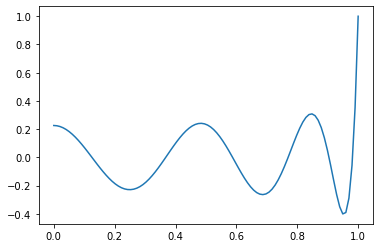

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
PATH = "batch1.hdf5"
f = h5py.File(PATH, 'r')
# print(f["Set1"].keys())
# print(np.array(f["Set1"]["Parameters"])[1,6])
# print(np.array(f["Set1"]["GImp"]).shape[1])
# print(np.linspace(0,99,100))

iv = np.linspace(0, (2*100+1)*np.pi/30, 100)

# with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
#     plt.figure(1)
#     plt.plot(iv, f["Set1"]["GImp"][440,:].imag)
    
from scipy.special import eval_legendre
n_freq = 100
leg_pol = np.linspace(0, n_freq-1, n_freq)
beta = 30 ### Later this needs to be dynamics
iv = np.linspace(0, (2*n_freq+1)*np.pi/beta, n_freq)
iv2 = np.linspace(0, 1, n_freq)
vectors = np.zeros((n_freq, n_freq))
for p in leg_pol:
    vectors[int(p),:] = eval_legendre(int(p), iv2)

with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(2)
    plt.plot(iv2, eval_legendre(12, iv2))
